In [123]:
%load_ext autoreload

%autoreload

import numpy as np
import visualization.array_rendering as ar
import visualization.creature_rendering as cr
import asset_generation.land_creation as lc

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


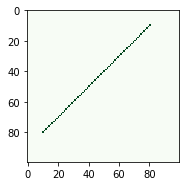

In [124]:
test_line = [80.0,10.0,10.0,80.0]
empty_template = np.zeros((100,100))
creature_id = 1

cr.detect_occluded_squares(empty_template, test_line, creature_id)

ar.render_array(empty_template)

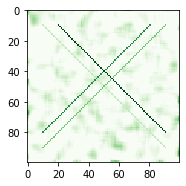

In [125]:

empty_template = lc.create_template(100, 100)
empty_template =  lc.add_smoothing_to_template(empty_template)
land, water = lc.generate_land_and_water_from_template(empty_template, 0.5)
entire_surface = lc.entire_surface(land, water)


num_segments = 4
creature_id = 0

creature = np.zeros(shape=(num_segments + 1, 5))
creature[0,0] = creature_id
creature[1] = [.1, 10.0,10.0,90.0,90.0]
creature[2] = [.2, 10.0,90.0,90.0,10.0]
creature[3] = [.3, 80.0,10.0,10.0,80.0]
creature[4] = [.4, 80.0,90.0,10.0,20.0]

cr.place_creature(land, creature)

ar.render_array(land)

In [126]:
def generate_random_simple_creature():

    c_id = 0
    num_segs = 3

    # Top row for info, other rows for segments
    sc = np.zeros(shape=(num_segs + 1, 5))

    # Generates an array that looks like this:
    #   c_id x_t  y_t  theta
    # [[ 0.,  0.,  0.,  0.,  0.],
    #    [ 0.,  0.,  0., -1.,  0.]]

    # Assign Id
    sc[0,0] = c_id
    sc[1] = [0.0, 0.0, 0.0, float(np.random.randint(-1, 1)), float(np.random.randint(-1, 1))]
    sc[2] = [0.0, sc[1,3], sc[1,4], sc[1,3] + float(np.random.randint(-1, 1)), sc[1,4] + float(np.random.randint(-1, 1))]
    sc[3] = [0.0, sc[2,3], sc[2,4], sc[2,3] + float(np.random.randint(-1, 1)), sc[2,4] + float(np.random.randint(-1, 1))]

    return sc

creature = generate_random_simple_creature()

In [127]:
def translate_creature_segs_to_world(c: np.ndarray):

    translated_c = c.copy()
    x_translation = c[0,1]
    y_translation = c[0,2]

    for line in translated_c[1:]:
        line[1], line[3] = line[1] + x_translation, line[3] + y_translation
        line[2], line[4] = line[2] + y_translation, line[4] + y_translation

    return translated_c

creature2 = generate_random_simple_creature()
creature2[0,1] = 50
creature2[0,2] = 30

translated_creature = translate_creature_segs_to_world(creature2)

translated_creature


array([[ 0., 50., 30.,  0.,  0.],
       [ 0., 50., 30., 30., 30.],
       [ 0., 50., 30., 30., 30.],
       [ 0., 50., 30., 29., 29.]])

In [128]:
matrix = np.random.randint(-5, 5, (4,4))
matrix

array([[-4,  4,  4,  0],
       [-2,  1, -3, -5],
       [ 1, -3,  1,  3],
       [ 3,  4, -3, -3]])

In [129]:
def rotate_vector(x, y, t):
    rot_mat = np.zeros(shape=(2,2))
    vector = np.zeros(shape=(1,2))
    rot_mat = [[np.cos(t), -np.sin(t)],
                 [np.sin(t), np.cos(t)]]
    vector = [[x],[y]]
    rotated_vector = np.matmul(rot_mat, vector)
    return rotated_vector

theta = np.pi/2
x = 1
y = 5
rotate_vector(x, y, theta)

array([[-5.],
       [ 1.]])